In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [164]:
df_LIWC = pd.read_csv('features-liwc2015', sep=' ')
df_result = pd.read_csv('outcomes', sep=' ')

In [165]:
df_LIWC.head()

,id,ACHIEVE,ADJ,ADVERB,AFFECT,AFFILIATION,ANGER,ANX,ARTICLE,ASSENT,...,SPACE,SWEAR,TENTAT,THEY,TIME,VERB,WE,WORK,YOU,Unnamed: 74
0,1,0.013948,0.035139,0.019539,0.034005,0.009933,0.002574,0.002075,0.042554,0.001191,...,0.040191,0.000692,0.009260,0.001806,0.031777,0.071046,0.002478,0.025590,0.029740,NaN
1,3,0.008114,0.025870,0.017965,0.033140,0.012115,0.010010,0.002864,0.028758,0.030203,...,0.060992,0.000490,0.007465,0.002643,0.031659,0.061078,0.005397,0.017023,0.004369,NaN
2,4,0.011303,0.040679,0.036365,0.053856,0.014579,0.006661,0.002584,0.044391,0.018619,...,0.050980,0.005169,0.017782,0.002967,0.042171,0.112426,0.002767,0.012686,0.015689,NaN
3,5,0.006012,0.022216,0.015682,0.022739,0.009148,0.001830,0.000784,0.028228,0.030842,...,0.035808,0.001307,0.007841,0.001307,0.020648,0.055672,0.002614,0.017250,0.009148,NaN
4,6,0.013545,0.055898,0.023477,0.036054,0.012839,0.002988,0.002483,0.032077,0.007126,...,0.036599,0.000727,0.021822,0.001090,0.032077,0.079052,0.001090,0.016452,0.044189,NaN


In [166]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 8 columns):
user_id       863 non-null int64
is_female     863 non-null int64
age           863 non-null int64
logdt         863 non-null float64
lognarc       863 non-null float64
logpsyc       863 non-null float64
logmach       863 non-null float64
Unnamed: 7    0 non-null float64
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [167]:
df_result.head()

,user_id,is_female,age,logdt,lognarc,logpsyc,logmach,Unnamed: 7
0,1,1,30,1.152680,1.321760,1.011600,1.098610,NaN
1,2,1,36,0.000000,0.000000,0.000000,0.000000,NaN
2,3,0,29,0.733969,0.405465,0.693147,1.011600,NaN
3,4,1,24,0.348307,0.223144,0.223144,0.559616,NaN
4,5,0,19,1.203970,1.558140,0.223144,1.386290,NaN


In [168]:
df_result.rename(columns={'user_id':'id'}, inplace=True)
df = pd.merge(df_LIWC, df_result, how='left')

In [169]:
df.dropna(axis=1, inplace=True)

In [170]:
df['psyc'] = df['logpsyc'].apply(lambda x: np.exp(x))
df.drop(columns=['is_female', 'age', 'logdt','lognarc','logmach', 'id'], inplace=True)
df.head()

,ACHIEVE,ADJ,ADVERB,AFFECT,AFFILIATION,ANGER,ANX,ARTICLE,ASSENT,AUXVERB,...,SWEAR,TENTAT,THEY,TIME,VERB,WE,WORK,YOU,logpsyc,psyc
0,0.013948,0.035139,0.019539,0.034005,0.009933,0.002574,0.002075,0.042554,0.001191,0.025091,...,0.000692,0.009260,0.001806,0.031777,0.071046,0.002478,0.025590,0.029740,1.011600,2.749997
1,0.008114,0.025870,0.017965,0.033140,0.012115,0.010010,0.002864,0.028758,0.030203,0.028514,...,0.000490,0.007465,0.002643,0.031659,0.061078,0.005397,0.017023,0.004369,0.693147,2.000000
2,0.011303,0.040679,0.036365,0.053856,0.014579,0.006661,0.002584,0.044391,0.018619,0.056277,...,0.005169,0.017782,0.002967,0.042171,0.112426,0.002767,0.012686,0.015689,0.223144,1.250001
3,0.006012,0.022216,0.015682,0.022739,0.009148,0.001830,0.000784,0.028228,0.030842,0.025353,...,0.001307,0.007841,0.001307,0.020648,0.055672,0.002614,0.017250,0.009148,0.223144,1.250001
4,0.013545,0.055898,0.023477,0.036054,0.012839,0.002988,0.002483,0.032077,0.007126,0.046753,...,0.000727,0.021822,0.001090,0.032077,0.079052,0.001090,0.016452,0.044189,0.000000,1.000000


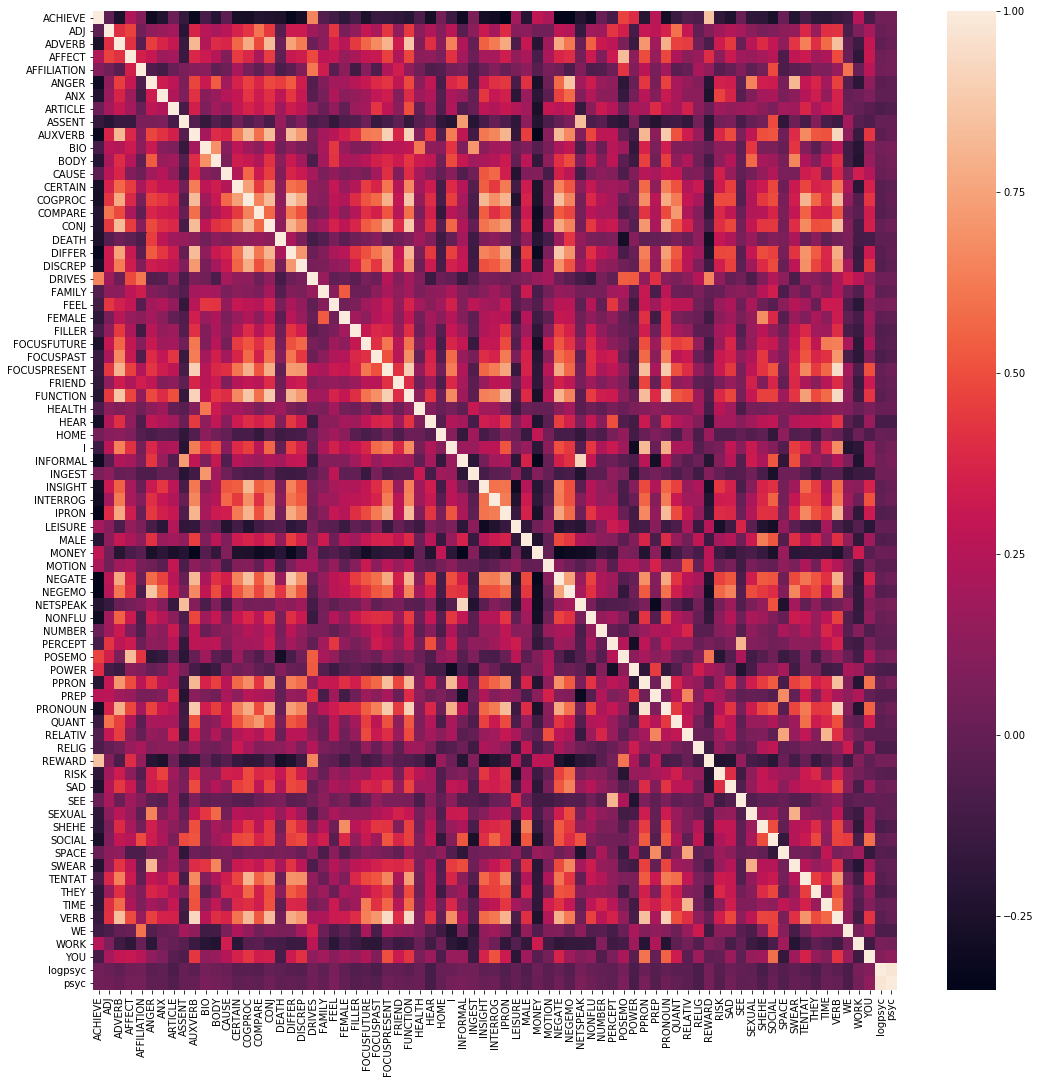

In [171]:
corr = df.corr()
fig = plt.figure(figsize=(18,18))
sns.heatmap(corr)

In [172]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
print(selected_columns)
# data = data[selected_columns]

Index(['ACHIEVE', 'ADJ', 'ADVERB', 'AFFECT', 'AFFILIATION', 'ANGER', 'ANX',
       'ARTICLE', 'ASSENT', 'AUXVERB', 'BIO', 'BODY', 'CAUSE', 'CERTAIN',
       'COGPROC', 'COMPARE', 'CONJ', 'DEATH', 'DIFFER', 'DISCREP', 'DRIVES',
       'FAMILY', 'FEEL', 'FEMALE', 'FILLER', 'FOCUSFUTURE', 'FOCUSPAST',
       'FRIEND', 'HEALTH', 'HEAR', 'HOME', 'I', 'INFORMAL', 'INGEST',
       'INSIGHT', 'INTERROG', 'IPRON', 'LEISURE', 'MALE', 'MONEY', 'MOTION',
       'NEGATE', 'NEGEMO', 'NONFLU', 'NUMBER', 'PERCEPT', 'POSEMO', 'POWER',
       'PPRON', 'PREP', 'QUANT', 'RELATIV', 'RELIG', 'REWARD', 'RISK', 'SAD',
       'SEE', 'SEXUAL', 'SHEHE', 'SOCIAL', 'SPACE', 'SWEAR', 'TENTAT', 'THEY',
       'TIME', 'WE', 'WORK', 'YOU', 'logpsyc'],
      dtype='object')


In [173]:
# columns = np.full((corr.shape[0],), True, dtype=bool)
for i in df.columns:
    if i not in df.columns[columns]:
        print(i)

FOCUSPRESENT
FUNCTION
NETSPEAK
PRONOUN
VERB
psyc


In [174]:
def distancing_score(row):    
    #intermediate numbers
    articles = row['ARTICLE']
    pasttense = row['FOCUSPAST']
    presenttense = row['FOCUSPRESENT']
    firstperson = 100 - row['I'] #inverse of first person singular pronoun
    discrepancy = row['DISCREP']
    
    Distancing = articles * pasttense * firstperson * presenttense * discrepancy #average of 6 intermediate numbers
    return Distancing

df['distancing'] = df.apply(distancing_score, axis=1)

In [178]:
our_model_df = df[['distancing', 'ANGER', 'SWEAR', 'psyc', 'logpsyc']]

,distancing,ANGER,SWEAR,psyc,logpsyc
distancing,1.000000,0.432734,0.379323,-0.052140,-0.084219
ANGER,0.432734,1.000000,0.817408,-0.015372,-0.028210
SWEAR,0.379323,0.817408,1.000000,-0.004508,-0.016263
psyc,-0.052140,-0.015372,-0.004508,1.000000,0.974005
logpsyc,-0.084219,-0.028210,-0.016263,0.974005,1.000000


In [179]:
# Use our model to get the main features from LIWC
X = our_model_df[['distancing', 'ANGER', 'SWEAR']]
y = our_model_df['psyc']

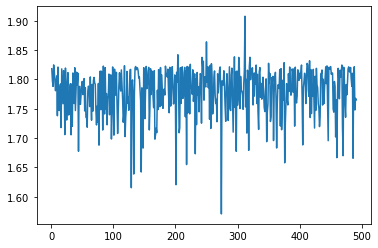

In [187]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
predictions = reg.predict(X)
plt.plot(range(1,492), predictions)